In [14]:
from keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv1D,MaxPooling2D,Dropout,BatchNormalization,AveragePooling2D,Input
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import mnist
import numpy as np

(60000, 28, 28)
(60000, 28, 28, 1)
(12000, 28, 28, 1)


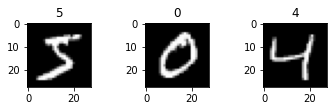

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()
print(x_train.shape)
x_train=x_train.reshape(x_train.shape[0], 28, 28 )
x_test = x_test.reshape(x_test.shape[0], 28, 28 )
for i in range(0,3):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);
x_train=x_train.reshape(x_train.shape[0], 28, 28,1 )
x_test = x_test.reshape(x_test.shape[0], 28, 28,1 )
print(x_train.shape)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=6)
print (x_val.shape)

In [3]:
y_train=to_categorical(y_train, num_classes = 10)
y_val=to_categorical(y_val, num_classes = 10)
y_test=to_categorical(y_test, num_classes = 10)

In [4]:
imagegen = image.ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,rotation_range=20)
train_batch = imagegen.flow(x_train, y_train,batch_size=96)
val_batch = imagegen.flow(x_val,y_val)
test_batch = imagegen.flow(x_test,y_test)

In [5]:
def model (shape, classes):
    input = Input(shape)
    X = Conv2D(32, (5, 5))(input)
    X = Conv2D(32, (5, 5))(X)
    X = AveragePooling2D(pool_size=(2,2))(X)
    X = Dropout(0.25)(X)
    X = Conv2D(32, (3, 3))(X)
    X = Conv2D(32, (3, 3))(X)
    X = AveragePooling2D(pool_size=(2,2))(X)
    X = Dropout(0.25)(X)
    X = Flatten()(X)
    X = Dense(256, activation = "relu")(X)
    X = Dense(classes, activation = "softmax")(X)
    model = Model(inputs=input,outputs=X, name ='mynet')
    return model
mymodel=model((28,28,1),10)
mymodel.summary()
mymodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])
history = mymodel.fit(train_batch,epochs = 10,validation_data= val_batch)

Model: "mynet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
average_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0     
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          9248  

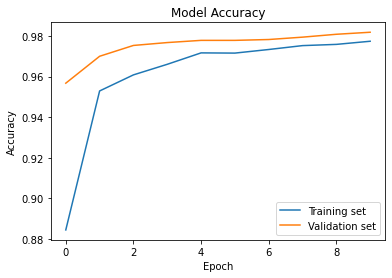

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='best')
plt.show()

In [8]:
print (mymodel.evaluate(test_batch))

313/313 [==============================] - 5s 18ms/step - loss: 0.0461 - accuracy: 0.9848
[0.046136558055877686, 0.9847999811172485]


In [26]:
mymodel.save("Model")

INFO:tensorflow:Assets written to: Model\assets


In [25]:
y_img_batch, y_class_batch = val_batch[0]
y_pred = np.argmax(mymodel.predict_generator(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print (mymodel.evaluate(val_batch))
print(classification_report(y_true, y_pred))
print (confusion_matrix(y_true,y_pred))

375/375 [==============================] - 7s 17ms/step - loss: 0.0548 - accuracy: 0.9837
[0.054760564118623734, 0.9836666584014893]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2

    accuracy                           0.97        32
   macro avg       0.97      0.98      0.97        32
weighted avg       0.98      0.97      0.97        32

[[3 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [1 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0